In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Some tensorflow warnings in the pipeline we inspect
from mlinspect.utils import get_project_root

from mlinspect import PipelineInspector
from mlinspect.inspections import MaterializeFirstOutputRows

EXAMPLE_PIPELINE = os.path.join(str(get_project_root()), "features", "explainability", "example_pipeline.py")

inspector_result = PipelineInspector\
    .on_pipeline_from_py_file(EXAMPLE_PIPELINE) \
    .add_required_inspection(MaterializeFirstOutputRows(5)) \
    .execute()

extracted_dag = inspector_result.dag
dag_node_to_inspection_results = inspector_result.dag_node_to_inspection_results
check_results = inspector_result.check_to_check_results

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Mean accuracy: 0.9041095890410958
Predict first 10 samples: [ True False  True False  True False False False  True False]


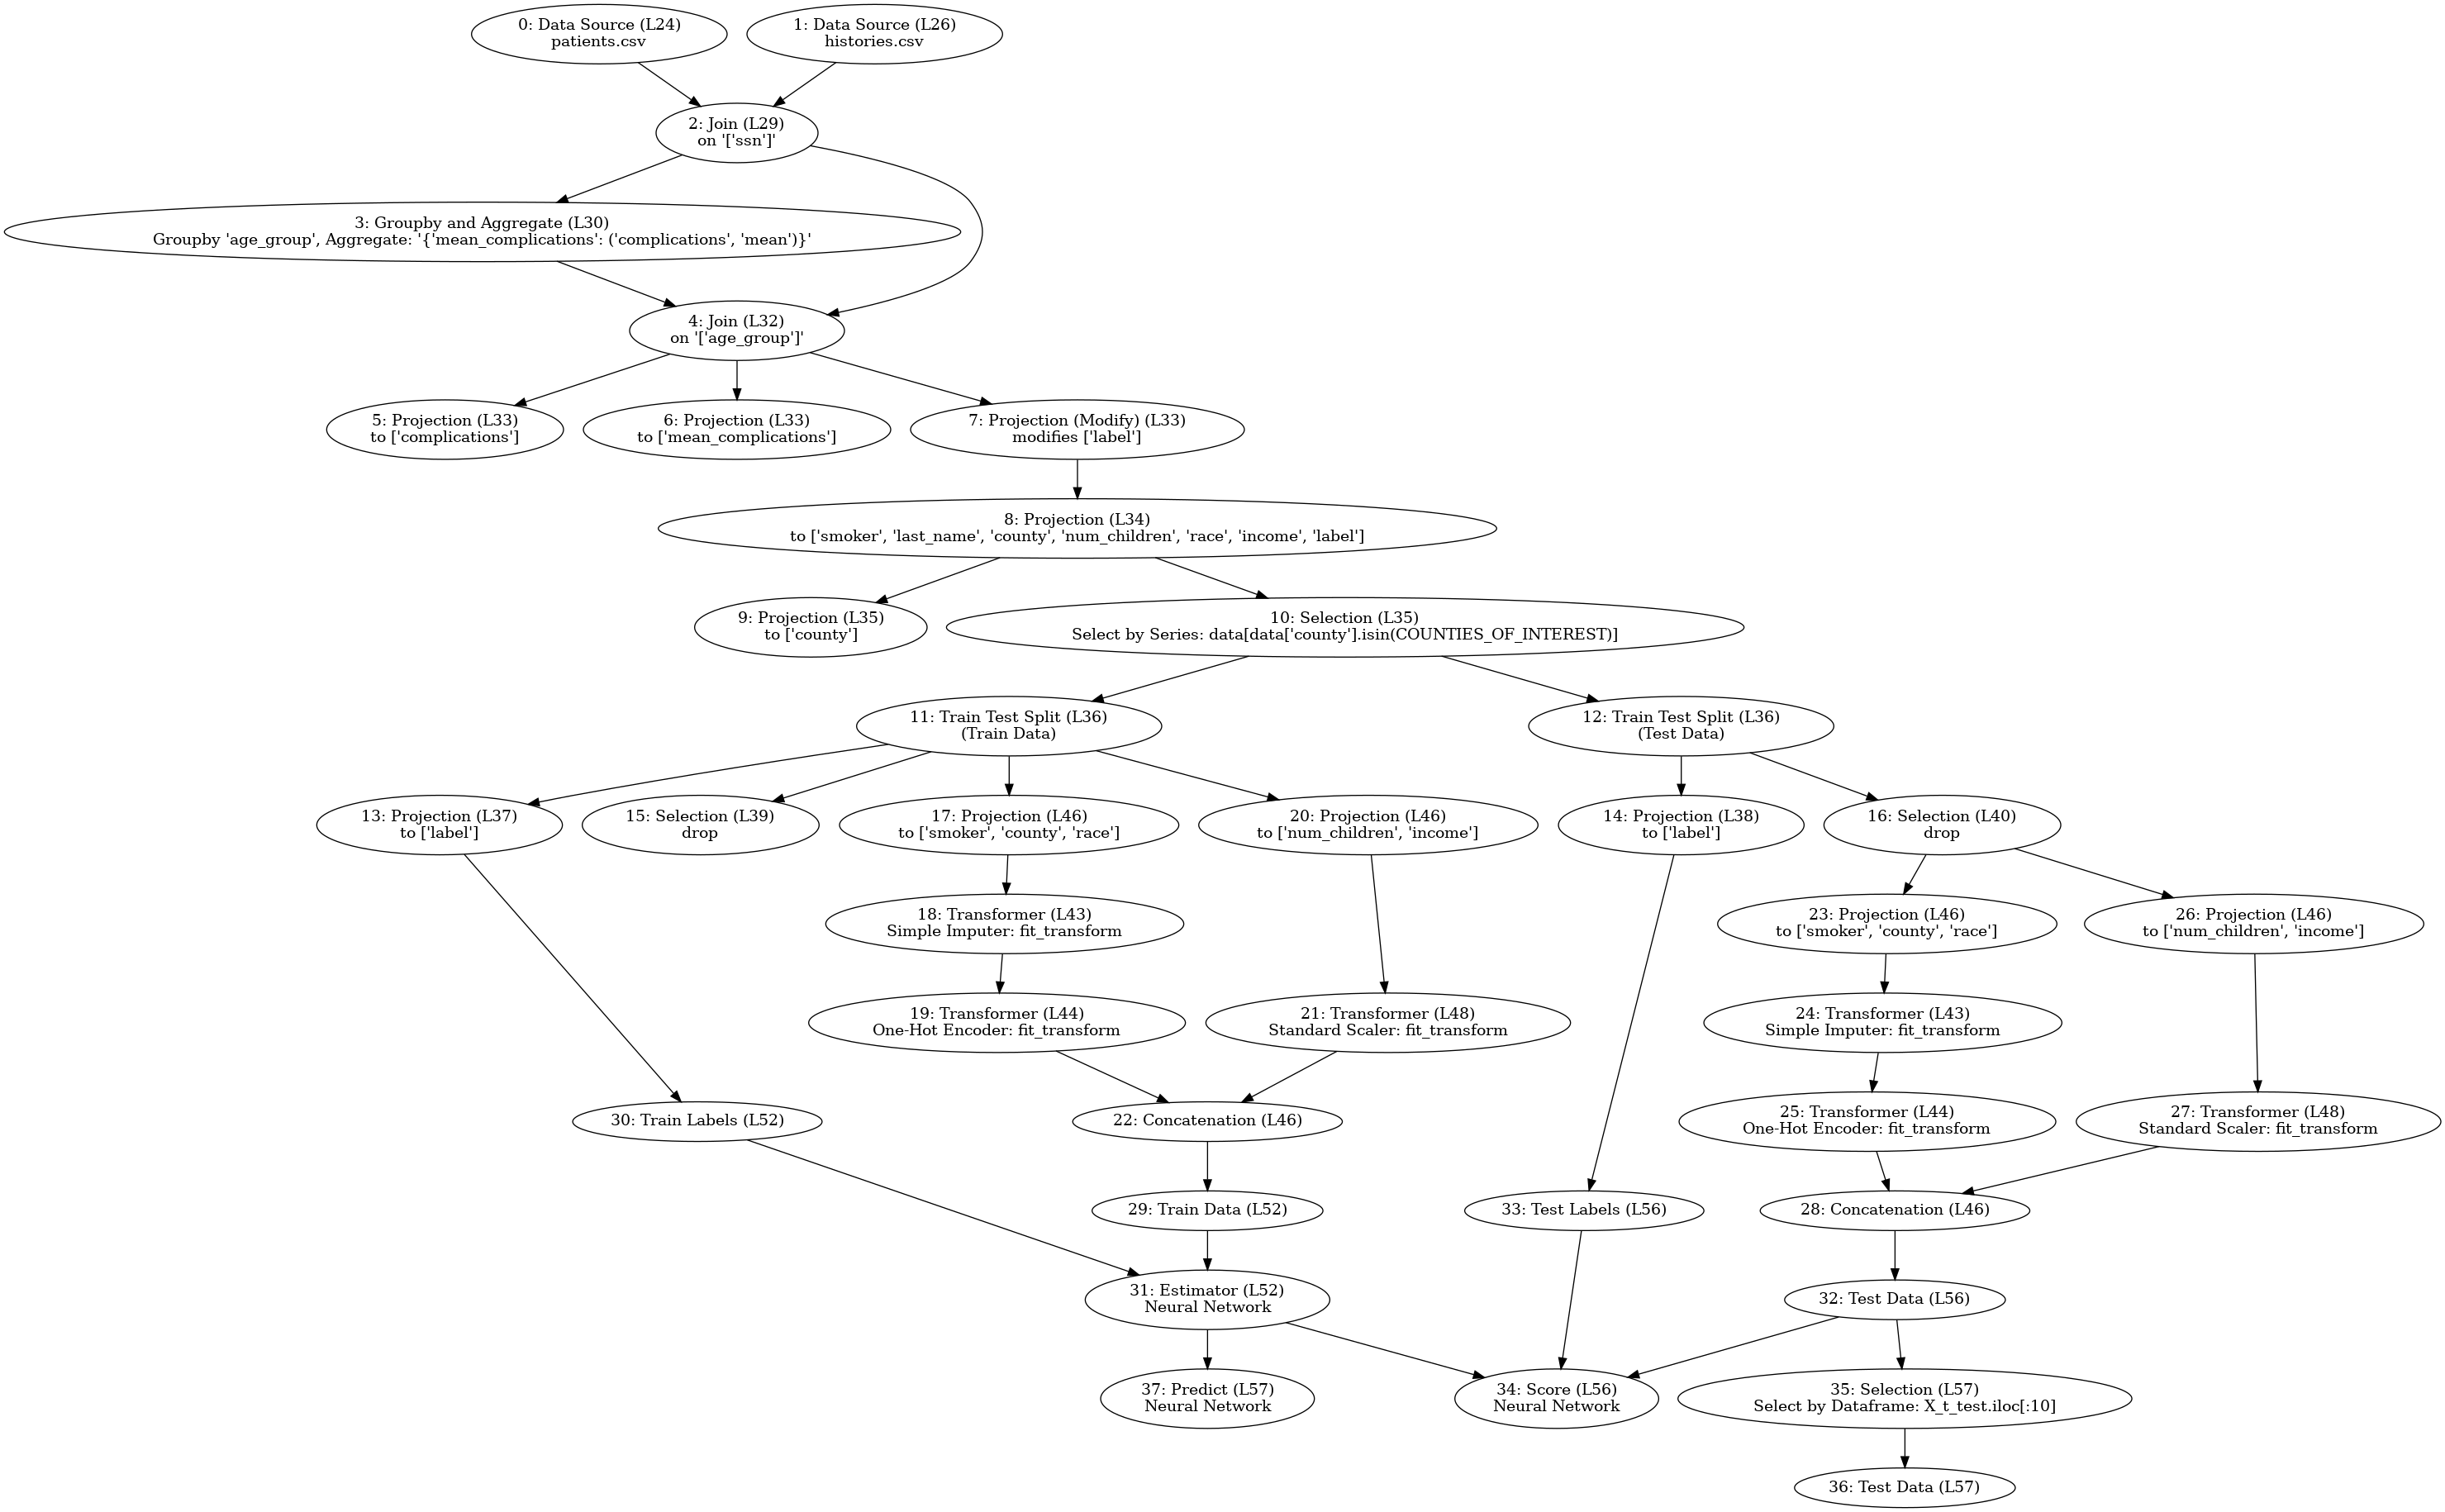

In [2]:
from IPython.display import Image
from mlinspect.visualisation import save_fig_to_path

filename = os.path.join(str(get_project_root()), "features", "explainability", "explainability.png")
save_fig_to_path(extracted_dag, filename)

Image(filename=filename)

In [ ]:
from IPython.display import display

check_result_df = PipelineInspector.check_results_as_data_frame(check_results)
display(check_result_df)

In [3]:
from IPython.display import display

relevant_nodes = [node for node in extracted_dag.nodes if node.node_id in {17, 18}]

for dag_node in relevant_nodes:
    print("\n\033[1m{} ({})\033[0m\n{}\n{}".format(
        dag_node.operator_info.operator,
        dag_node.details.description,
        dag_node.optional_code_info.source_code,
        dag_node.optional_code_info.code_reference))
    materialize_inspection_result = dag_node_to_inspection_results[dag_node][MaterializeFirstOutputRows(5)]
    display(materialize_inspection_result)


OperatorType.PROJECTION (to ['smoker', 'county', 'race'])
ColumnTransformer(transformers=[
    ("impute_and_one_hot_encode", impute_and_one_hot_encode, ['smoker', 'county', 'race']),
    ('numeric', StandardScaler(), ['num_children', 'income']),
], remainder='drop')
CodeReference(lineno=46, col_offset=16, end_lineno=49, end_col_offset=20)


,smoker,county,race
0,True,county3,NaN
1,False,county2,race1
2,True,county3,NaN
3,False,county3,race3
4,True,county3,race3



OperatorType.TRANSFORMER (Simple Imputer: fit_transform)
SimpleImputer(strategy='most_frequent')
CodeReference(lineno=43, col_offset=15, end_lineno=43, end_col_offset=54)


,smoker,county,race
0,True,county3,race1
1,False,county2,race1
2,True,county3,race1
3,False,county3,race3
4,True,county3,race3


In [3]:
relevant_nodes = [node for node in extracted_dag.nodes if node.node_id in {36}]

for dag_node in relevant_nodes:
    print("\n\033[1m{} ({})\033[0m\n{}\n{}".format(
        dag_node.operator_info.operator,
        dag_node.details.description,
        dag_node.optional_code_info.source_code,
        dag_node.optional_code_info.code_reference))
    materialize_inspection_result = dag_node_to_inspection_results[dag_node][MaterializeFirstOutputRows(5)]
    display(materialize_inspection_result)


OperatorType.TEST_DATA (None)
neural_net.predict(X_t_test.iloc[:10])
CodeReference(lineno=57, col_offset=35, end_lineno=57, end_col_offset=73)


,impute_and_one_hot_encode__smoker_False,impute_and_one_hot_encode__smoker_True,impute_and_one_hot_encode__county_county2,impute_and_one_hot_encode__county_county3,impute_and_one_hot_encode__race_race1,impute_and_one_hot_encode__race_race2,impute_and_one_hot_encode__race_race3,numeric__num_children,numeric__income
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.732972,0.751482
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.124766,-0.292572
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.699854,-0.667395
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.091648,-1.299548
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.091648,0.856903
